In [1]:
%matplotlib notebook

from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math

### Initialisations

Let us write some helper functions to initialise weights and biases. We'll initialise weights as Gaussian random variables with mean 0 and variance 0.0025. For biases we'll initialise everything with a constant 0.1. This is because we're mainly going to be using ReLU non-linearities.

In [2]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.05)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

### Model

Let's define the model. The model is defined as follows:

* An input that is 728 dimensional vector. 
* Reshape the input as 28x28x1 images (only 1 because they are grey scale) 
* A convolutional layer with 25 filters of shape 12x12x1 and a ReLU non-linearity (with stride (2, 2) and no padding)
* A convolutional layer with 64 filters of shape 5x5x25 and a ReLU non-linearity (with stride (1, 2) and padding to maintain size)
* A max_pooling layer of shape 2x2
* A fully connected layer taking all the outputs of the max_pooling layer to 1024 units and ReLU nonlinearity
* A fully connected layer taking 1024 units to 10 no activation function (the softmax non-linearity will be included in the loss function rather than in the model)

In [3]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, shape=[None, 784])
x_ = tf.reshape(x, [-1, 28, 28, 1])
y_ = tf.placeholder(tf.float32, shape=[None, 10])


# Define the first convolution layer here

# Layer configuration
filter_size_conv1 = 12
num_input_channels_conv1 = 1
num_filters_conv1 = 25
strides_conv1 = (2,2)
# The padding is set to 'VALID' which means the input image is not padded.
padding_conv1 = 'VALID'
name_conv1 ='CONV1'

# Weights shape = [filter_size, filter_size, num_input_channels, num_filters]
W_shape_conv1 = [filter_size_conv1, filter_size_conv1, num_input_channels_conv1, num_filters_conv1]

# Create new weights aka. filters with the given shape.
W_conv1 = weight_variable(W_shape_conv1)

# Bias shape = [num_filters]
b_shape_conv1 = [num_filters_conv1]

# Create new biases, one for each filter.
b_conv1 = bias_variable(b_shape_conv1)

# Create convolutional layer
h_conv1 = tf.layers.conv2d(inputs=x_, 
                           filters = num_filters_conv1, # or = W_conv1?
                           kernel_size = (filter_size_conv1, filter_size_conv1),
                           strides = strides_conv1,
                           padding = padding_conv1,
                           name = name_conv1,
                           activation = tf.nn.relu)
#with tf.variable_scope(name_conv1,reuse=True):
#   W_conv1 = tf.get_variable("kernel")

# Define the second convolution layer here

# Layer configuration
filter_size_conv2 = 5
num_input_channels_conv2 = 25
num_filters_conv2 = 54
strides_conv2 = (1,2)
# The padding is set to 'SAME' which means the input image
# is padded with zeroes so the size of the output is the same.
padding_conv2 = 'SAME'
name_conv2 = 'CONV2'

# Weights shape = [filter_size, filter_size, num_input_channels, num_filters]
W_shape_conv2 = [filter_size_conv2, filter_size_conv2, num_input_channels_conv2, num_filters_conv2]

# Create new weights aka. filters with the given shape.
W_conv2 = weight_variable(W_shape_conv2)

# Bias shape = [num_filters]
b_shape_conv2 = [num_filters_conv2]

# Create new biases, one for each filter.
b_conv2 = bias_variable(b_shape_conv2)

# Create convolutional layer
h_conv2 = tf.layers.conv2d(inputs=h_conv1,
                           filters = num_filters_conv2,
                           kernel_size = (filter_size_conv2, filter_size_conv2),
                           strides = strides_conv2,
                           padding = padding_conv2,
                           name = name_conv2,
                           activation = tf.nn.relu)

# Define maxpooling

pool_size_pool2 = (2,2)
strides_pool2 = 2
name_pool2 = 'POOL'
h_pool2 = tf.layers.max_pooling2d(inputs=h_conv2,
                                  pool_size = pool_size_pool2,
                                  strides = strides_pool2,
                                  name= name_pool2)

# All subsequent layers will be fully connected ignoring geometry so we'll flatten the layer
# Flatten the h_pool2_layer (as it has a multidimensiona shape) 
name_pool2_flat = 'POOL_FLAT'

h_pool2_flat = tf.layers.flatten(inputs=h_pool2,
                                name=name_pool2_flat)


# Define the first fully connected layer here
# W_fc1 = 
# b_fc1 = 
units_fc1 = 1024
name_fc1 = "FC1"
h_fc1 = tf.layers.dense(inputs=h_pool2_flat,
                        units=units_fc1,
                        name = name_fc1,
                        activation=tf.nn.relu)

# Use dropout for this layer (should you wish)
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# The final fully connected layer
# W_fc2 = 
# b_fc2 = 
units_conv = 10
name_conv = "FC_FINAL"
y_conv = tf.layers.dense(inputs=h_fc1,
                        name = name_conv,
                        units=units_conv)



#### Loss Function, Accuracy and Training Algorithm

* We'll use the cross entropy loss function. The loss function is called `tf.nn.cross_entropy_with_logits` in tensorflow

* Accuray is simply defined as the fraction of data correctly classified

* For training you should use the AdamOptimizer (read the documentation) and set the learning rate to be 1e-4. You are welcome, and in fact encouraged, to experiment with other optimisation procedures and learning rates. 

* (Optional): You may even want to use different filter sizes once you are finished with experimenting with what is asked in this practial

In [4]:
# We'll use the cross entropy loss function 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))

# And classification accuracy
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# And the Adam optimiser
train_step = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [5]:
# Load the mnist data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [6]:
# Let us visualise the first 16 data points from the MNIST training data

fig = plt.figure()
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.imshow(mnist.train.images[i].reshape(28, 28), cmap='Greys_r')  

<IPython.core.display.Javascript object>

##Training the model

You should now train your neural network using minibatches of size 50. Try about 1000-5000 iterations. Keep track of the validation accuracy every 100 iterations, however. Once you are sure your optimisation is working properly, you should run the resulting model on the test data and report the test error.

In [7]:
# Start a tf session and run the optimisation algorithm
sess = tf.Session()
sess.run(tf.global_variables_initializer())

num_epochs = 3000
batch_size = 50

for i in range(num_epochs):
    # Get a batch of training examples.
    batch = mnist.train.next_batch(batch_size)
    x_batch, y_batch= batch
    
    # Put the batch into a dict with the proper names
    # for placeholder variables in the TensorFlow graph.
    feed_dict_train = {x: x_batch, y_: y_batch}

    # Run the optimizer using this batch of training data.
    sess.run(train_step, feed_dict=feed_dict_train)
    
    # Print status every 100 iterations.
    if i % 100 == 0:
        
        # Calculate the accuracy on the training-set.
        acc = sess.run(accuracy, feed_dict=feed_dict_train)

        # Message for printing.
        msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%}"

        # Print it.
        print(msg.format(i + 1, acc))

Optimization Iteration:      1, Training Accuracy:   8.0%
Optimization Iteration:    101, Training Accuracy:  86.0%
Optimization Iteration:    201, Training Accuracy:  86.0%
Optimization Iteration:    301, Training Accuracy:  82.0%
Optimization Iteration:    401, Training Accuracy:  92.0%
Optimization Iteration:    501, Training Accuracy:  96.0%
Optimization Iteration:    601, Training Accuracy:  92.0%
Optimization Iteration:    701, Training Accuracy:  90.0%
Optimization Iteration:    801, Training Accuracy:  90.0%
Optimization Iteration:    901, Training Accuracy:  86.0%
Optimization Iteration:   1001, Training Accuracy:  94.0%
Optimization Iteration:   1101, Training Accuracy:  94.0%
Optimization Iteration:   1201, Training Accuracy:  92.0%
Optimization Iteration:   1301, Training Accuracy: 100.0%
Optimization Iteration:   1401, Training Accuracy:  92.0%
Optimization Iteration:   1501, Training Accuracy:  88.0%
Optimization Iteration:   1601, Training Accuracy:  92.0%
Optimization I

In [9]:
# Calculate and print accuracy on the test set
print ('Test accuracy: %g' % sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

Test accuracy: 0.9778


#### Visualising the Filters

We'll now visualise all the 25 filters in the first convolution layer. As they are each of shape 12x12x1, they may themselves be viewed as greyscale images. Visualising filters in further layers is more complicated and involves modifying the neural network. See the [paper](http://www.matthewzeiler.com/pubs/arxive2013/arxive2013.pdf) by Matt Zeiler and Rob Fergus if you are interested. 

<IPython.core.display.Javascript object>


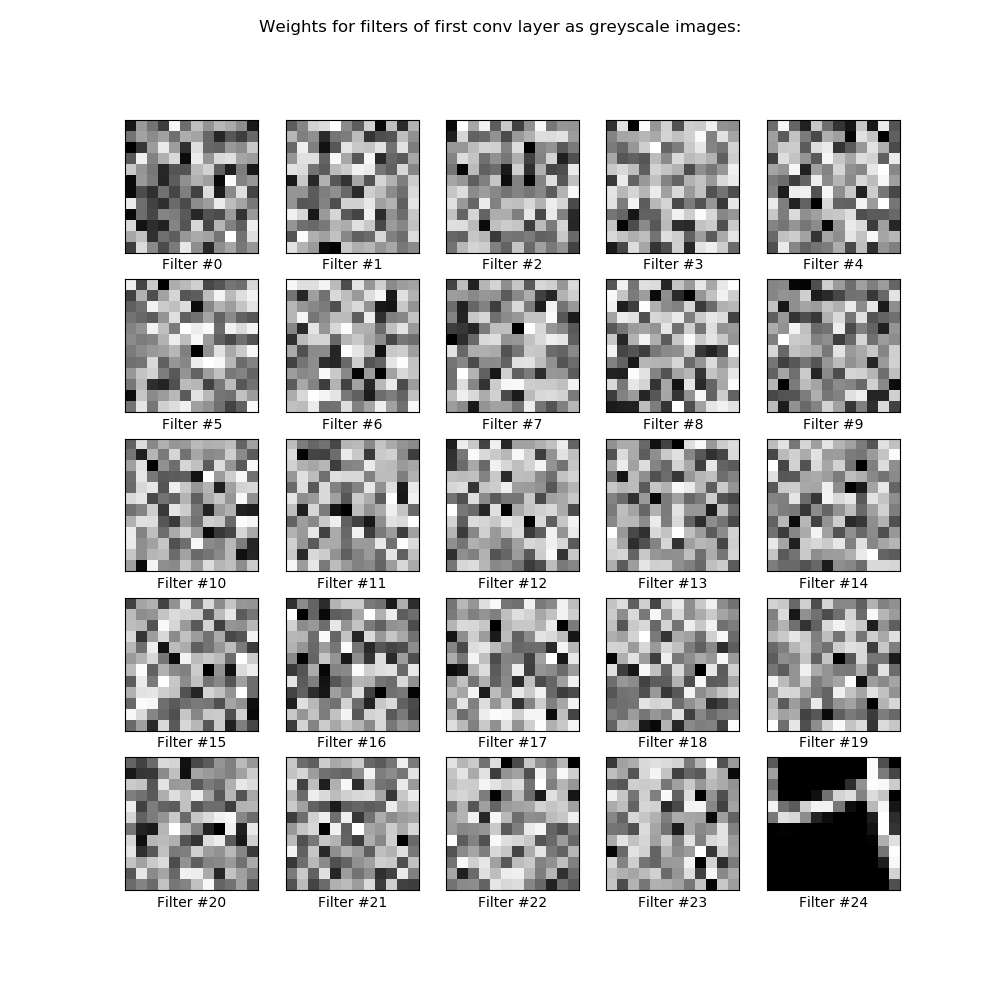

In [10]:
# Visualise the filters in the first convolutional layer

# Set W as the weights of each filter in conv1 layer, with shape=(12, 12, 1, 25)
with sess.as_default():
    W = W_conv1.eval()

fig = plt.figure()
fig.suptitle('Weights for filters of first conv layer as greyscale images:', fontsize=12)
num_columns = 5
num_rows = math.ceil(num_filters_conv1 / num_columns)
for i_filter in range(num_filters_conv1):
    ax = fig.add_subplot(num_rows, num_columns, i_filter + 1)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set(xlabel='Filter #'+str(i_filter))
    # Show weights of ith filter in conv1 and use greyscale
    ax.imshow(W[:,:,0,i_filter], cmap='Greys_r')


#### Identifying image patches that activate the filters

For this part you'll find the 12 patches in the test-set that activate each of the first 5 filters that maximise the activation for that filter.

In [16]:
def plotNImagesForFilter(H, images, n, i_filter):
    num_columns = 4
    num_rows = math.ceil(n / num_columns)
    fig = plt.figure()
    for i_n in range(0, n, 1):
        ax = fig.add_subplot(num_rows, num_columns, i_n + 1)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.imshow(H[i_n,:,:,i_filter], cmap='Greys_r')

def totalFilterActivationForPatch(H, i_patch, i_filter):
    return sum(sum(H[i_patch, :, :, i_filter]))


# Visualise patches in the test set that find the most result in 
# the highest activations for filters 0, ... 4
H =  sess.run(h_conv1, feed_dict={x: mnist.test.images})

# Plot for each of the first 5 filters...
#for i_filter in range(0, 5, 1):
#    totalActivationPerPatch = []
    # Iterate over all patches in test set and calculate their filter activation
#    for i_patch in range(H.shape[0]):
#        totalActivationPerPatch.append(sum(sum(H[i_patch,:,:,i])))
    # Get indeces of the 12 largest values in totalActivationPerPatch
#    max_12_patches = np.array(totalActivationPerPatch)
#    max_12_patches.argsort()[-12:][::-1]
#    
#    plotNImagesForFilter(H, max_12_patches, 12, i_filter)

    

(10000, 9, 9)
(array([6150]), array([6]), array([4]))
2.659241
2.659241


<IPython.core.display.Javascript object>


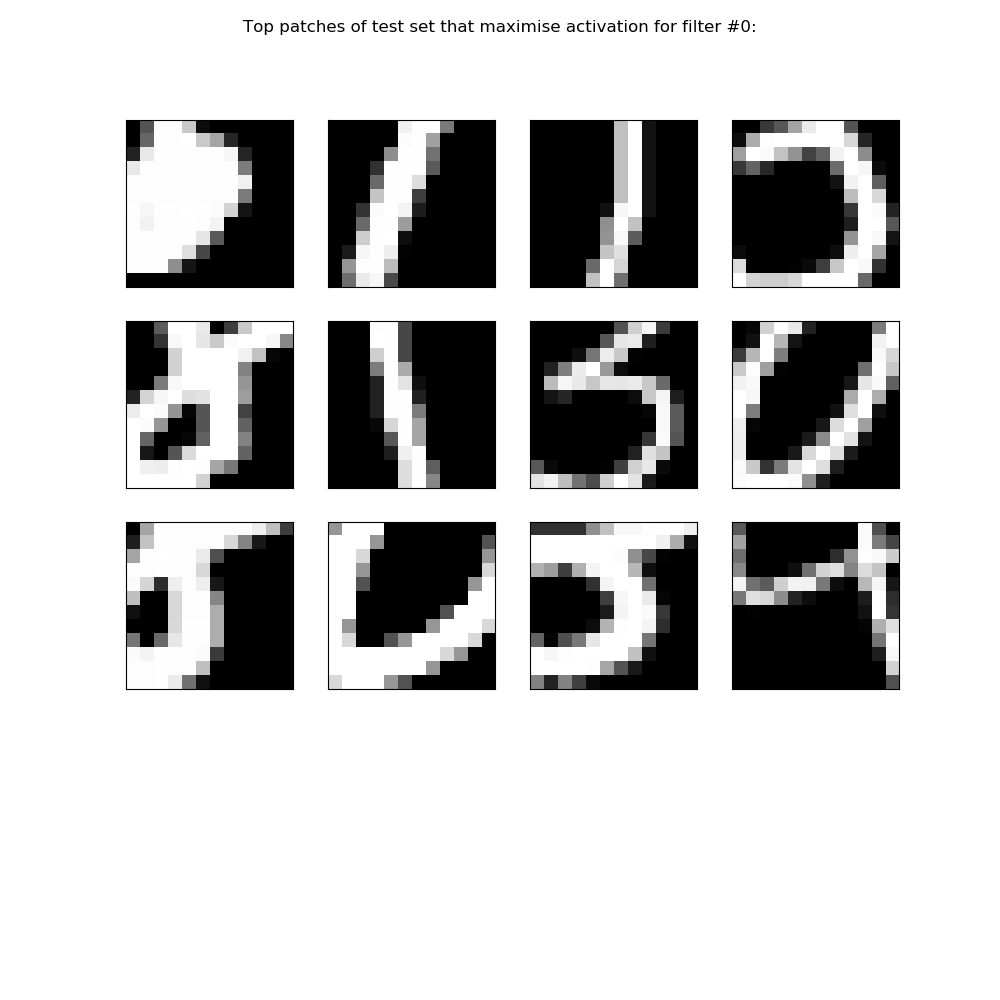

<IPython.core.display.Javascript object>


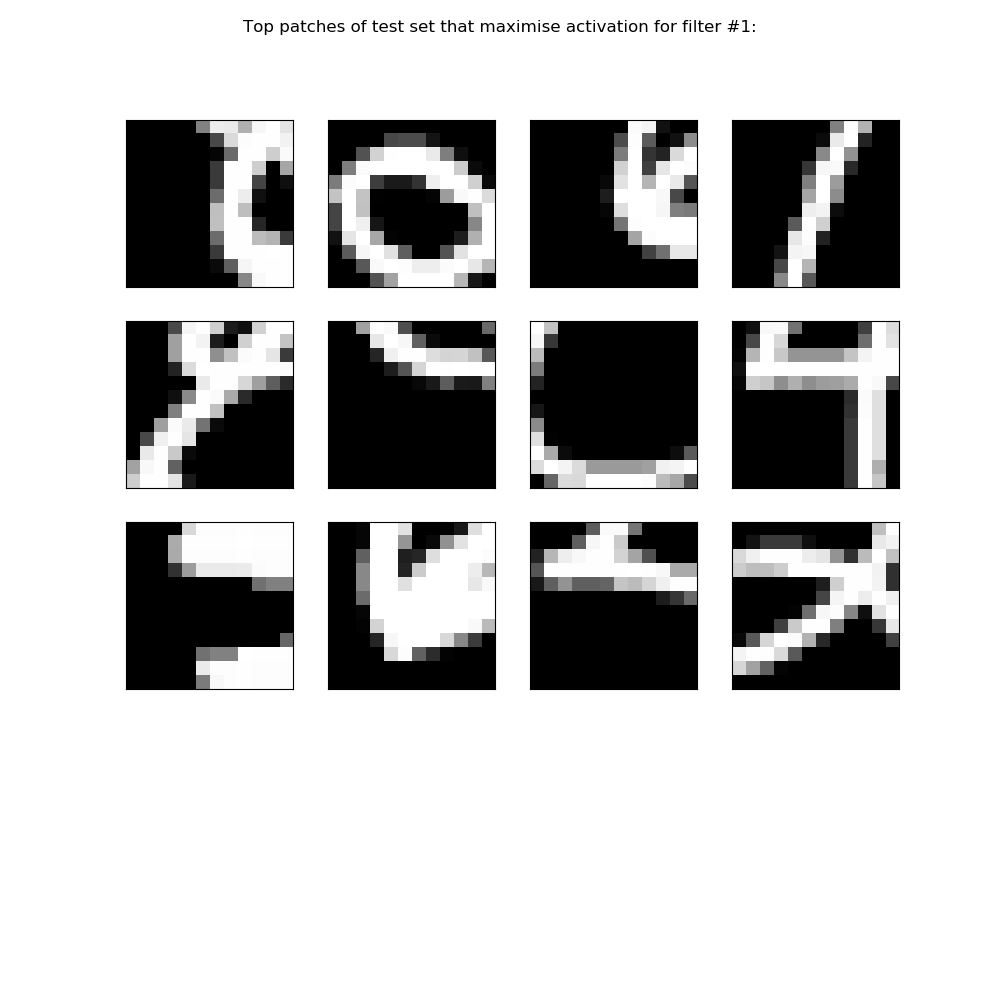

<IPython.core.display.Javascript object>


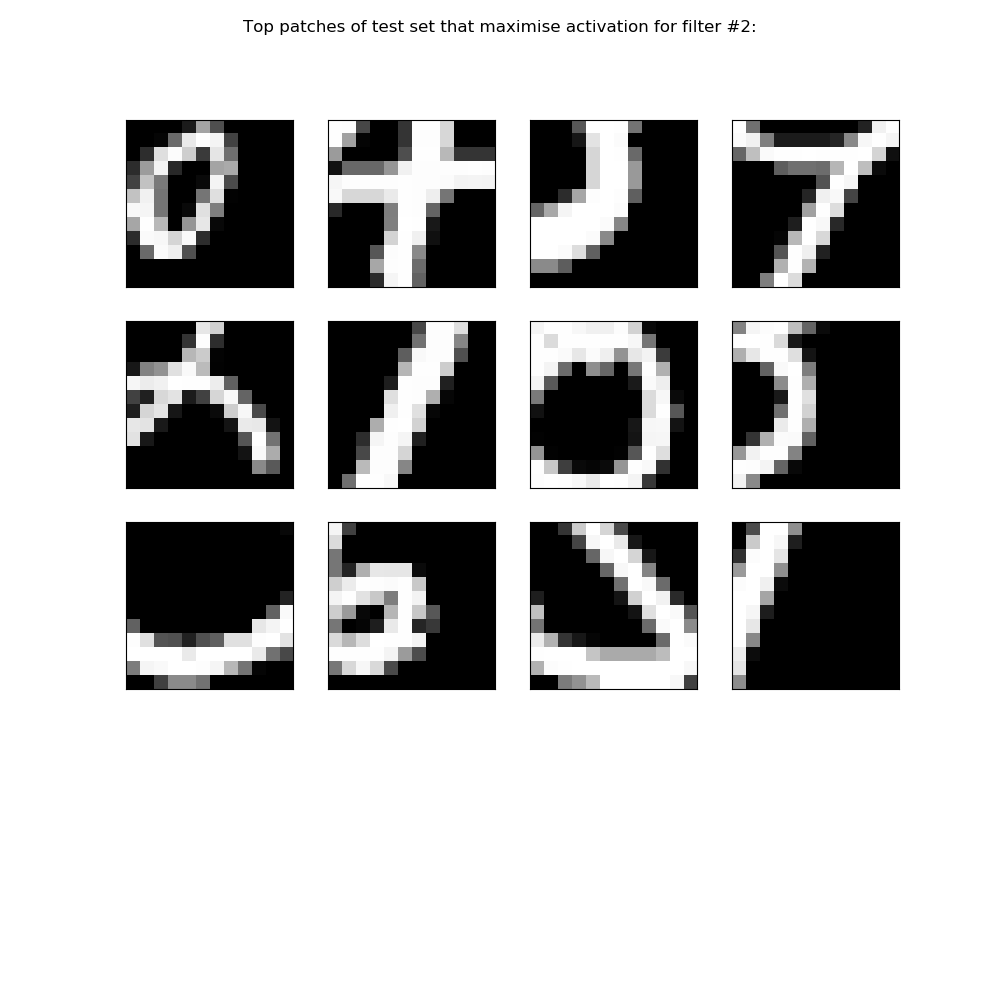

<IPython.core.display.Javascript object>


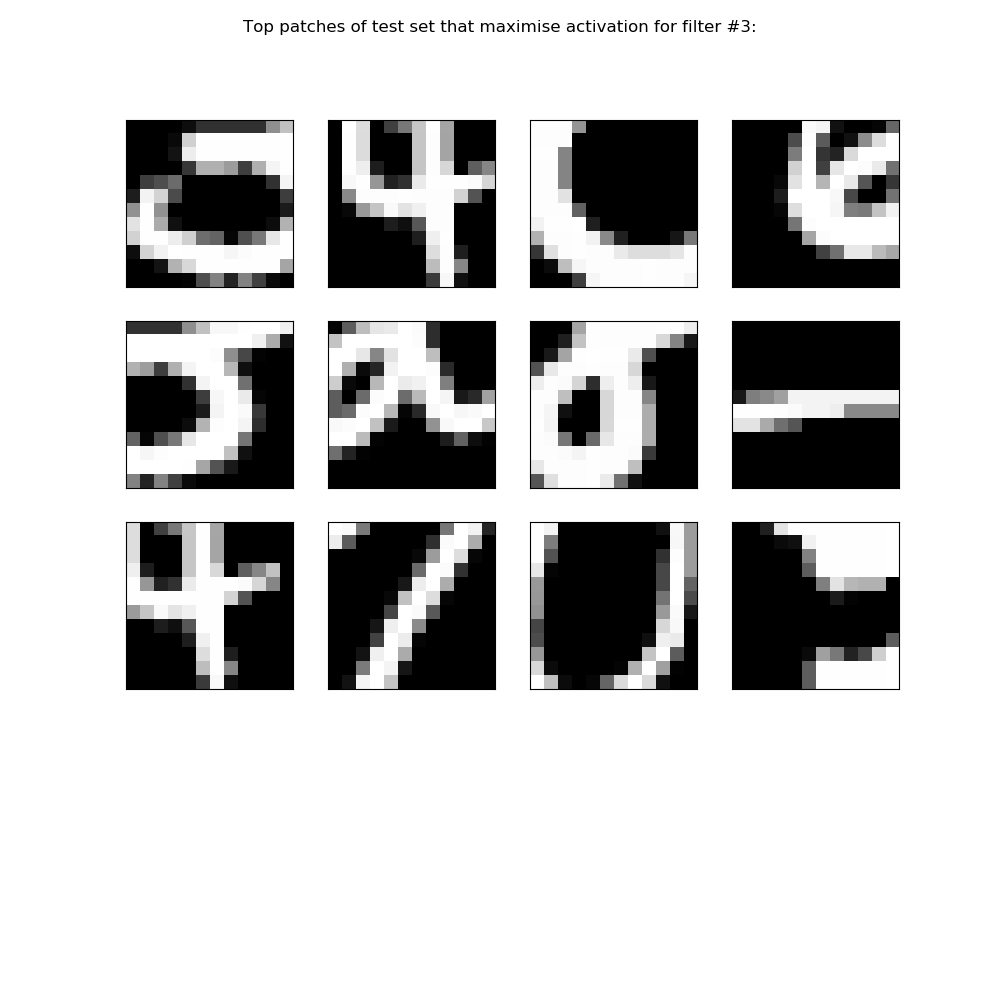

<IPython.core.display.Javascript object>


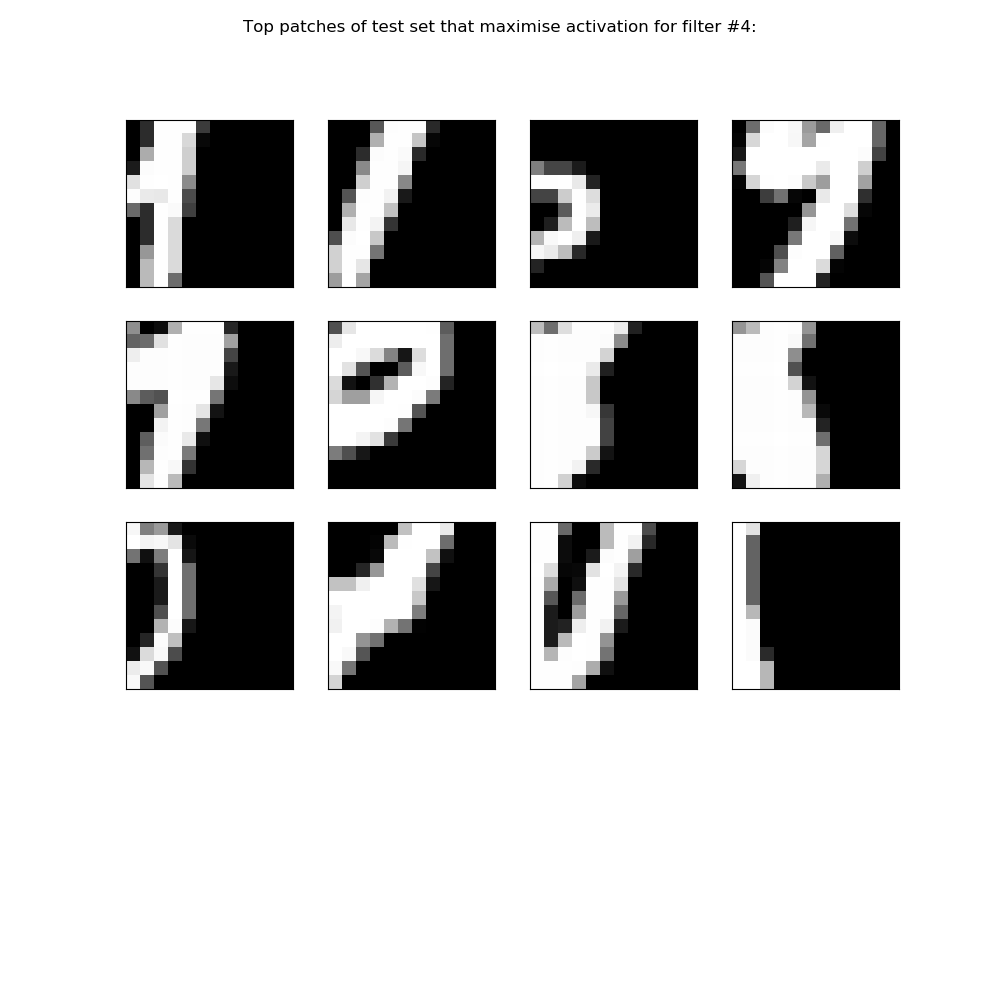

In [37]:

for filter in range(5):
    fig = plt.figure()
    fig.suptitle('Top patches of test set that maximise activation for filter #'+str(filter)+':', fontsize=12)
    for top in range(12):
        shape = H[:,:,:,filter].shape
        max_vals = H[:,:,:,filter].argsort(axis= None)[-12:]
        num_img, ai, j = np.unravel_index(max_vals[top], shape)
        image = mnist.train.images[num_img].reshape(28, 28)
        ax = fig.add_subplot(4, 4, top+1)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.imshow(image[i*2:i*2+12,j*2:j*2+12], cmap='Greys_r')
